# Проект: Исследование стартапов

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

###  Цели и задачи проекта

**Цели:** 
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

Принять решения:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что означают покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику;
- постараться выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `rating` с другими данными.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Таблицы, которые понадобятся в проекте:

- `company_and_rounds.csv` - содержит информацию о компаниях и раундах финансирования;
- `acquisition.csv` - содержит информацию о покупках одними компаниями других компаний;
- `people.csv` - содержит информацию о сотрудниках;
- `education.csv` - содержит информацию информацию об образовании сотрудника;
- `degrees.csv` - содержит информацию  о типе образования сотрудника.



## Знакомство с данными: загрузка и первичная предобработка

Необоходимо выгрузить данные основных таблиц:
- `company_and_rounds.csv` - содержит информацию о компаниях и раундах финансирования;
- `acquisition.csv` - содержит информацию о покупках одними компаниями других компаний;
- `people.csv` - содержит информацию о сотрудниках;
- `education.csv` - содержит информацию информацию об образовании сотрудника;
- `degrees.csv` - содержит информацию  о типе образования сотрудника.

а также данные дополнительных таблиц:
- `fund.csv`;
- `investment.csv`.

### Вывод общей информации, исправление названия столбцов

1. Загрурузка всех данных по проекту.
2. Проверка названия столбцов.
3. Вывод информации, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt

In [2]:
try:
    acquisition_df = pd.read_csv('https://.../acquisition.csv')
    company_and_rounds_df = pd.read_csv('https://.../company_and_rounds.csv')
    degrees_df = pd.read_csv('https://.../degrees.csv')
    education_df = pd.read_csv('https://.../education.csv')
    fund_df = pd.read_csv('https://.../fund.csv')
    investment_df = pd.read_csv('https://.../investment.csv')
    people_df = pd.read_csv('https://.../people.csv')
except ZeroDivisionError:
    print('Something is wrong')
else:
    print("Операция выполнена успешно.")

Операция выполнена успешно.


In [3]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [6]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [7]:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [8]:
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [9]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [10]:
# Заменим пробелы на нижнее подчеркивание
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

In [11]:
# Приведем название столбца к company_ID к нижнему регистру
company_and_rounds_df = company_and_rounds_df.rename(columns = {'company_ID': 'company_id_funded', 
                                                                'company_id': 'company_id'})

#### Промежуточные выводы

1. Датасет `acquisition.csv` состоит из 6 колонок и 9407 строк, имеет корректные названия столбцов. Необходимо изменить тип для колонки `acquired_at` на datetime64.
2. Датасет `company_and_rounds.csv` состоит из 22 колонок и 217774 строк. Необходимо привести названия столбцов к формату snake_case. Колонки `founded_at`, `closed_at` привести к типу datetime64, колонки `investment rounds`, `milestones`, `pre money valuation`, `participants`, `is first round`, `is last round` к типу int8. Колонка с id компании встерчается в датасете дважды: `company ID` и `company id`. Это могло произойти в случае объединения двух датасетов в один.
3. Датасет `degrees.csv` состоит из 4 колонок и 109610 строк, имеет корректные названия столбцов и типы колонок.
4. Датасет `education.csv` состоит из 4 колонок и 109610 строк, имеет корректные названия столбцов. Необходимо изменить тип для колонки `graduated_at` на datetime64. 
5. Датасет `fund.csv` состоит из 9 колонок и 11652 строк, имеет корректные названия столбцов. Необходимо изменить тип для колонки `founded_at` на datetime64. 
Датасет `investment.csv` состоит из 4 колонок и 61403 строк, имеет корректные названия столбцов и типы колонок.
6. Датасет `people.csv` состоит из 5 колонок и 226709 строк, имеет корректные названия столбцов. Необходимо привести колонку `company_id` к типу int16.

---


### Смена типов и анализ пропусков

1. Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
2. Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

#### Обработка типов данных

In [12]:
acquisition_df['acquired_at'] = acquisition_df['acquired_at'].astype('datetime64[ns]')

In [13]:
company_and_rounds_df[['founded_at', 
                       'closed_at', 
                       'funded_at']] = company_and_rounds_df[['founded_at', 
                                                              'closed_at', 
                                                              'funded_at']].astype('datetime64[ns]')

In [14]:
education_df['graduated_at'] = education_df['graduated_at'].astype('datetime64[ns]')

In [15]:
fund_df['founded_at'] = fund_df['founded_at'].astype('datetime64[ns]')

In [16]:
# Убедимся, что тип столбцов изменен корректно
print(acquisition_df['acquired_at'].dtypes)
print(company_and_rounds_df['founded_at'].dtypes)
print(company_and_rounds_df['closed_at'].dtypes)
print(company_and_rounds_df['funded_at'].dtypes)
print(education_df['graduated_at'].dtypes)
print(fund_df['founded_at'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Анализ пропусков

In [17]:
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [18]:
acquisition_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

Пропуски в столбце `term_code` не могут помешеть корректному изучению данных т.к. ниформация о вариантах расчета в рамках текущего исследования для нас не существенна. Доля пропусков в столбце `acquired_at` составляет 0.003, что не может существенно повлиять на итоговые выводы.

In [19]:
company_and_rounds_df.isna().sum()

company_id_funded         302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [20]:
company_and_rounds_df.isna().mean()

company_id_funded      0.001387
name                   0.001391
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

В большинстве столбцов дата присутствует существенная доля пропусков это может серьезно повлиять на анализ данных и итоговые выводы.

In [21]:
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [22]:
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102372
subject        0.258298
dtype: float64

Доля пропусков составляет 10 и 25 процентов. Такое количество пропусков не может существенно повлиять на анализ и итоговые выводы.

In [23]:
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [24]:
education_df.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Большое кол-во пропусков в колонке graduated_at (дата получения образования) может существенно повлиять на анализ и итоговые выводи т.к. пропуски составляют почти 50% от общего числа записей в датасете. При этом мы достаточно точно сможем судить о названии учебного заведения instituition т.к. доля пропусков в этом столбце составляет всего 0.000502.

In [25]:
people_df.isna().sum()

id                       0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [26]:
people_df.isna().mean()

id                  0.000000
first_name          0.000040
last_name           0.000018
company_id          0.847315
network_username    0.828560
dtype: float64

Так как доля пропусков в колонках company_id, network_username составляет более 80% от общего числа строк невозможно будет сделать корректные выводы о том каких компаниях работаю сотрудники и присутствуют ли они в соц. сетях.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам
1. Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
2. Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
3. На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.
4. На основе полученных данных ответим на вопросы:
    - В каком году типичный размер собранных в рамках одного раунда средств был максимален?
    - Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [27]:
# Извлекаем год из поля funded_year (дата финансирования)
company_and_rounds_df['funded_at_year'] = company_and_rounds_df['funded_at'].dt.year

In [28]:
# Создадим сводную таблицу с группировкой по годам
pivot_table = pd.pivot_table(company_and_rounds_df,
                          index='funded_at_year', 
                          values=['raised_amount', 'funding_round_id'], 
                          aggfunc={'raised_amount':'median', 'funding_round_id':'count'})

In [29]:
# Ограничим таблицу годами, где было более 50 раундах финансирования
pivot_table_filtred = pivot_table[(pivot_table['funding_round_id'] > 50)]

In [30]:
# Отобразим полученную таблицу
pivot_table_filtred.sort_values(by='funded_at_year', ascending=False)

,funding_round_id,raised_amount
funded_at_year,,
2013.0,11072,1200000.0
2012.0,9970,1000000.0
2011.0,9204,1200000.0
2010.0,6221,1602500.0
2009.0,4151,2000000.0
2008.0,3774,3110000.0
2007.0,3279,3973320.0
2006.0,2436,5000000.0
2005.0,1633,5500000.0


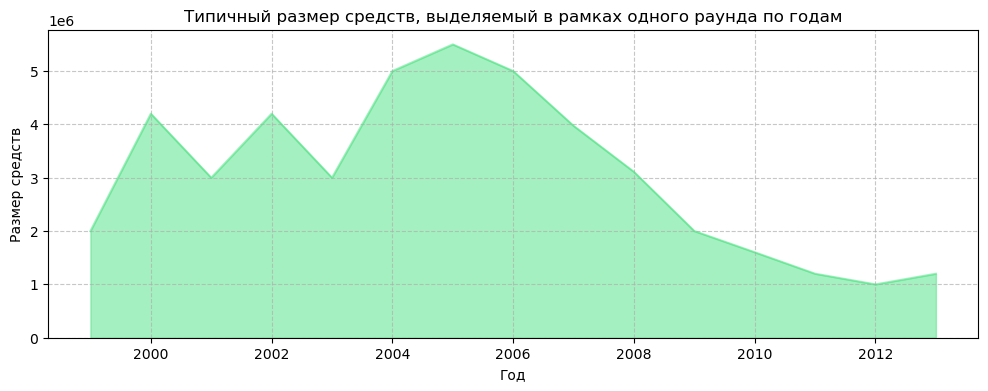

In [31]:
# Строим линейный график 
pivot_table_filtred.plot(kind='area',
                         stacked=False,
                         y='raised_amount',
                         grid=True,
                         legend=False,
                         figsize=(12, 4),
                         color='#4BE282',
)

# Измените название осей и название графика
plt.title('Типичный размер средств, выделяемый в рамках одного раунда по годам')
plt.xlabel('Год')
plt.ylabel('Размер средств')

plt.grid(True, linestyle='--', alpha=0.7)
plt.fill()

plt.show()

Пик был в 2005 году, после этого количество выделяемых средств снижалось и достигло совоего минимума в 2012 году 100000. После 2012 произошло незначительно увеличение. 


### Люди и их образование

Необходимо определить, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.
* Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
* Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [32]:
# Объединим таблицы people.csv и education.csv
df_workers_ed = people_df.merge(education_df, left_on='id', right_on='person_id', how='left')

In [33]:
df_workers_ed.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
# Посчитаем количество сотрудников в каждой компании и выведем таблицу на экран
employees_per_companys = df_workers_ed.groupby('company_id').agg(cnt_employees=('id_x',
                                                                                'count')).sort_values(by='cnt_employees', 
                                                                                                    ascending=False)

print(f'Количество сотрудников в компаниях:')
employees_per_companys.head()

Количество сотрудников в компаниях:


,cnt_employees
company_id,
59.0,376
29.0,221
1242.0,192
231067.0,111
4175.0,89


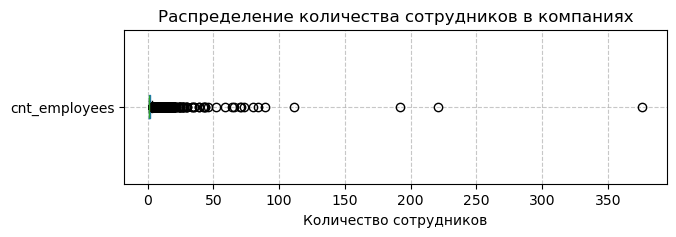

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
employees_per_companys.boxplot(column='cnt_employees', vert=False)

plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем заголовок и метки оси
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')

# Выводим график
plt.show()

In [36]:
# Получим краткое статистическое описание данных
# employees_per_companys_slice.describe()

В данных о количестве сотрудников наблюдается большое количество выбросов, значение стандартного отклонения очень высоко, также велика разница между средним и медианным значениями. Попробуем ограничить выборку 99 и 25 квантилями.

In [37]:
outliers = employees_per_companys['cnt_employees'].quantile(0.99)
Q1 = employees_per_companys['cnt_employees'].quantile(0.25)
employees_new_df = employees_per_companys.loc[(employees_per_companys['cnt_employees'] > Q1) 
                                 & (employees_per_companys['cnt_employees'] < outliers)]

In [38]:
employees_new_df.describe()

,cnt_employees
count,8542.000000
mean,2.983493
std,1.557871
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


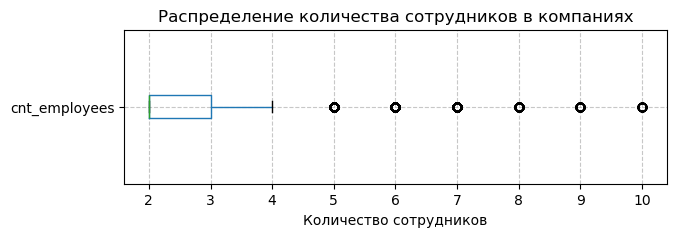

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
employees_new_df.boxplot(column='cnt_employees', vert=False)

plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем заголовок и метки оси
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')

# Выводим график
plt.show()

Количество выбросов существенно снизилось, стандартное отклонение уменьшилось с 46 до 1.5, разница между средним и медианным значением также сократились с 15 до 1. Построим гистограмму распределения на основе полученной выборки.

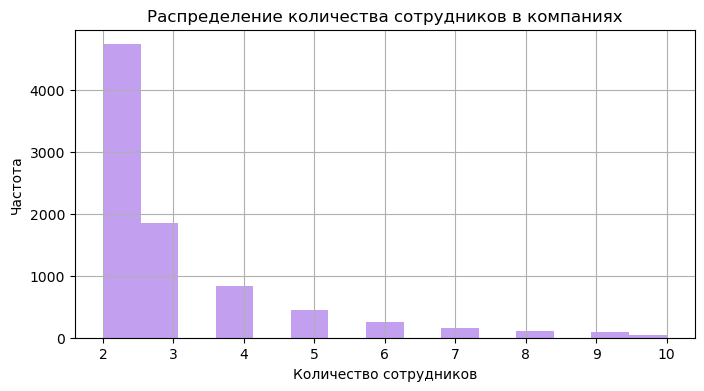

In [40]:
# Строим гистограмму 
employees_new_df['cnt_employees'].plot(kind='hist', 
                                 bins=15,
                                 alpha=0.7,
                                 rot=0, 
                                 figsize=(8, 4),
                                 legend=False,
                                 color='#A877E9'
)

# Настраиваем оформление графика
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [41]:
grouped_by_company_id = df_workers_ed.groupby('company_id').agg({'id_x':'count', 
                                                                 'id_y':'count', }).sort_values(by='id_x', ascending=False)

print(f'Количество сотрудников в компаниях:')
grouped_by_company_id.head()

Количество сотрудников в компаниях:


,id_x,id_y
company_id,,
59.0,376,300
29.0,221,181
1242.0,192,155
231067.0,111,97
4175.0,89,82


In [42]:
# Посчитаем количество сотрудников без информации об образовании
grouped_by_company_id['without_inf'] = grouped_by_company_id['id_x'] - grouped_by_company_id['id_y']

print(f'Количество сотрудников в компаниях:')
grouped_by_company_id

Количество сотрудников в компаниях:


,id_x,id_y,without_inf
company_id,,,
59.0,376,300,76
29.0,221,181,40
1242.0,192,155,37
231067.0,111,97,14
4175.0,89,82,7
...,...,...,...
68693.0,1,1,0
68695.0,1,0,1
68710.0,1,0,1


Разобъем данные на 6 групп по количеству сотрудников в компании
- 1-ая группа <= 3 сотрудников
- 2-ая группа > 3 и <= 10
- 3-ая группа > 10 и <= 21
- 4-ая группа > 21 и <= 34
- 5-ая группа > 34 и <= 63
- 6-ая группа > 63

In [43]:
# Разобъем компании на группы
grouped_by_company_id['group_num'] = grouped_by_company_id['id_x'].apply(lambda x: 6 if x > 63
                                                                 else (5 if x <= 63 and  x > 34 
                                                                 else (4 if x <= 34 and  x > 21
                                                                 else (3 if x <= 21 and  x > 10
                                                                 else (2 if x <= 10 and  x > 3
                                                                 else (1 if x <= 3
                                                                 else 0))))))
grouped_by_company_id.head()

,id_x,id_y,without_inf,group_num
company_id,,,,
59.0,376,300,76,6
29.0,221,181,40,6
1242.0,192,155,37,6
231067.0,111,97,14,6
4175.0,89,82,7,6


In [44]:
# Для каждой группы компаний рассчитаем среднее количество сотрудников и среднее кол-во сотрудников с информацией об образовании

grouped_by_group_num = grouped_by_company_id.groupby('group_num').agg({'id_x':'sum', 'without_inf':'sum'})

print(f'Количество сотрудников в компаниях:')
grouped_by_group_num

Количество сотрудников в компаниях:


,id_x,without_inf
group_num,,
1,29191,11794
2,10444,3081
3,2595,795
4,584,129
5,478,77
6,1497,275


In [45]:
grouped_by_group_num['share'] = grouped_by_group_num['without_inf'] / grouped_by_group_num['id_x']
grouped_by_group_num

,id_x,without_inf,share
group_num,,,
1,29191,11794,0.404029
2,10444,3081,0.295002
3,2595,795,0.306358
4,584,129,0.220890
5,478,77,0.161088
6,1497,275,0.183701


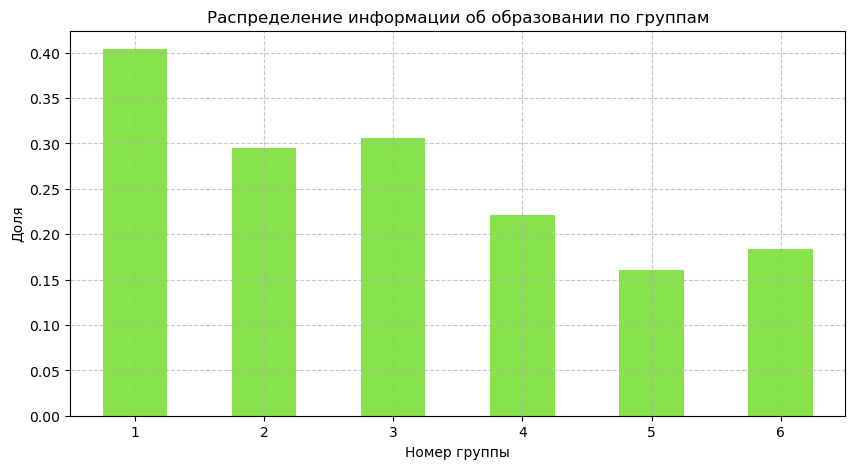

In [46]:
# Строим столбчатую диаграмму
grouped_by_group_num['share'].plot(
               kind='bar', 
               rot=0,
               figsize=(10, 5),
               color='#87E24B'
               
)

plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение информации об образовании по группам')
plt.xlabel('Номер группы')
plt.ylabel('Доля')

# Выводим график
plt.show()

In [47]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Так как в таблице `degrees` идентификатор сотрудника представлен в формате `object` соединить датасеты невозможно. Попробуем убрать подпись 'p:' в столбце `object_id` и преобразовать тип колонки в целочисленное значение.

In [48]:
degrees_df['object_id_num'] = degrees_df['object_id']
degrees_df['object_id_num'] = degrees_df['object_id'].str.replace('p:', '')
degrees_df['object_id_num'] = degrees_df['object_id_num'].astype('int64')
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             109610 non-null  int64 
 1   object_id      109610 non-null  object
 2   degree_type    98389 non-null   object
 3   subject        81298 non-null   object
 4   object_id_num  109610 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.2+ MB


После проведенных преобразований попробуем присоединить датасет `degrees.csv` к `people.csv` и `education.csv`.

In [49]:
df_workers_mer = degrees_df.merge(education_df, left_on='object_id_num', right_on='id', how='outer')
df_workers_mer.head() 

,id_x,object_id,degree_type,subject,object_id_num,id_y,person_id,instituition,graduated_at
0,NaN,NaN,NaN,NaN,NaN,1.0,6117.0,NaN,NaT
1,699.0,p:2,BS,Electrical Engineering/Computer Science,2.0,2.0,6136.0,"Washington University, St. Louis",1990-01-01
2,700.0,p:2,BS,Applied Mathematics,2.0,2.0,6136.0,"Washington University, St. Louis",1990-01-01
3,706.0,p:3,BBA,NaN,3.0,3.0,6136.0,Boston University,1992-01-01
4,707.0,p:3,MBA,NaN,3.0,3.0,6136.0,Boston University,1992-01-01


Объединим таблицы people_df и df_workers_mer. 

In [50]:
# Объединим таблицы people.csv и education.csv
df_workers_mg = people_df.merge(df_workers_mer, left_on='id', right_on='person_id', how='left')

In [51]:
df_workers_mg.head()

,id,first_name,last_name,company_id,network_username,id_x,object_id,degree_type,subject,object_id_num,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Исходя из полученной информации можно сделать вывод, что чем меньше в компании сотрудников тем больше у неё есть информации об образовании сотрудников.

После преобразований поля `object_id` все три таблицы получилось объединить.

### Объединение таблиц

1. Определим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
2. Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [52]:
# Посчитаем долю пропусков в колонке network_username таблицы people
people_df_mis = people_df['network_username'].isna().mean()
print(people_df_mis)

0.8285599601250943


In [53]:
# Посчитаем долю пропусков в колонке network_username таблицы fund
fund_df_mis = fund_df['network_username'].isna().mean()
print(fund_df_mis)

0.8155681428081016


In [54]:
# Посчитаем долю пропусков в колонке network_username таблицы company_and_rounds 
company_and_rounds_df_mis = company_and_rounds_df['network_username'].isna().mean()
print(company_and_rounds_df_mis)

0.5613158595608291


In [55]:
# Создадим множества
people_set = set(people_df['network_username'])
fund_set = set(fund_df['network_username'])
company_and_rounds_set = set(company_and_rounds_df['network_username'])

# Посчитаем количество элементов в столбце network_username присутствующих во всех 3-х датасетах
print(len(people_set & fund_set & company_and_rounds_set))

8


В столбец `network_username` присутствует большое количество пропусков их доля варьируется от 0.56 до 0.82. Общее количество уникальных элементов в столбце, которое присутствует в обоих датасетах равно 7. Исходя из полученной информации можно сделать вывод, что столбец `network_username` не подходит для объединения.


### Причина возникновения пропусков
Больше всего пропусков обнаружено в датасете `company_and_rounds.csv`. При этом данные о размере средств, которые хранятся в этой таблице считают наиболее верными. В связи с этим необходимо:
1. Привесити данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. 
2. Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Для этого разделим датасет company_and_rounds_df на две отдельные таблицы:
- первая с информацией о компаниях.
- вторая с информацией о раундах финансирования.

Посчитаем кол-во пропусков и их долю для каждой таблицы. Определим причины возникновения пропусков.

In [56]:
# Посчитаем количество пропусков в каждой колонке
company_and_rounds_df.isna().sum()

company_id_funded         302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
funded_at_year         165094
dtype: int64

In [57]:
# Посчитаем долю пропусков в каждой колонке
company_and_rounds_df.isna().mean()

company_id_funded      0.001387
name                   0.001391
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id             0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
funded_at_year         0.758098
dtype: float64

Причины возникновения пропусков:

- `category_code` 3113 пропусков (3%). Пропусков достаточно мало, можно предположить что они возникли либо из-за человеческого фактора, либо из-за технических неполадок.
- `founded_at` 16793 пропуска (16%). Можно предположить, что пропуски в данной колонке могли возникнуть по нескольким причинам.что из-за того, что в итоге компания таки и не получила финансирование на что указывют колонки `raised_amount` = 0 или NaN, `investment rounds` = 0 или nan, по техническим причинам или из-за человеческого фактора.
- `closed_at` 94103 пропуска (98%). Только по 2% компаний в данной колонке нет пропусков. Можно предположить, что ошибки нет и пропуск обозначает, что компания всё ещё открыта.  
- `domain` 524 пропуска (0.5%). Пропусков очень мало. Пропуски могли возникнуть из-за человеческого фактора, по технической причине, либо из-за того что у компании нет сайта или на момент заполнения данных он не функционировал.
- `country_code` 25687 пропусков (26%). Значительное количество пропусков. 

Колонки указанные ниже имеют одинковое количество пропусков 61521 пропуск (64%):
- `funding_round_id`;
- `company_id`;
- `funding_round_type`;
- `raised_amount`;
- `pre_money_valuation`;
- `participants`;
- `is_first_round`;
- `is_last_round`.

Одинаковое число пропусков может говорить о том, что пропуски в этих колонках возникли по одной и той же причине. Можно предположить, что часть информации пропала при некорректном объединении двух таблиц. Заказчик указывал на то, что изначально данные о ранудах хранились в более удобном формате. Возможно было две таблицы одна хранила информацию об инвесируемых компаниях, вторая данные об этапах инвестирования, при не правильно объединении таблици значительная часть информации пропала. На это так же указывают похожие названия столбцов такие как: `company ID` и `company id`, `founded at` и  `funded at`.

- `funded_at` 61635 в данной колонке число пропусков бизко к тому значению, что было у колонко выше. Можно предположить, что в этой колонке пропуски могли возникнуть по той же причине.
- `founded_at_year` 16793 пропусков. Не рассматриваем пропуски в этой колонке т.к. это производная от колонки `founded_at`.

---

Проверим таблицы на явные и неявные дубликаты.

In [58]:
# Проверим уникальные значения в столбцах, поищем неявные дубликаты
for column in ['name', 'category_code', 'status', 'country_code', 'investment_rounds', 
               'funding_rounds', 'milestones', 'funding_round_id', 'funding_round_type',
               'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'funded_at_year']:
    print(f'Уникальные значения в столбце {column}:')
    print(company_and_rounds_df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['! Haz Life' '!mpossible'
 '!nterprise Network Services - US West Communications' ... 'Übermind'
 'óga' nan]

Уникальные значения в столбце category_code:
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]

Уникальные значения в столбце status:
['acquired' 'closed' 'ipo' 'operating' nan]

Уникальные значения в столбце country_code:
['AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ANT' 'ARA' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BWA' 'CAN' 

In [59]:
# Нормализуем данные в столбце с названием компании
company_and_rounds_df['name'] = company_and_rounds_df['name'].str.lower()
company_and_rounds_df['name'] = company_and_rounds_df['name'].str.strip()

In [60]:
# Посчитаем общее поличество явных дубликатов в датафрейме
duplicated_rows = company_and_rounds_df.duplicated().sum()
print(duplicated_rows)

0


Создадим две отдельные таблицы: 
- первая с информацией о компаниях;
- вторая с информацией о раундах платежей.

In [61]:
# Создадим отдельную таблицу с информацией о компаниях
df_company = company_and_rounds_df[['company_id_funded', 'name', 'category_code', 'status', 
                                    'founded_at', 'closed_at', 'domain', 
                                    'network_username', 'country_code', 
                                    'investment_rounds', 'funding_rounds', 
                                    'funding_total', 'milestones']]

In [62]:
#Удалим дубли записей
df_company = company_and_rounds_df.drop_duplicates(subset=['company_id_funded', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 
                             'funding_rounds', 'funding_total', 'milestones'], keep='first')

In [63]:
# Создадим таблицу с информацией о раундах финансирования
df_rounds = company_and_rounds_df[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'funded_at_year']]

In [64]:
# Смоторим пропуски
display(df_rounds[df_rounds['funding_round_type'].isna()].head())

# Убираем пропуски по колонке
df_rounds=df_rounds.dropna(subset=['funding_round_type'])

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Рассчитаем долю пропусков в колонке funding_round_type
df_rounds['funding_round_type'].isna().mean()

0.0

In [66]:
# Отсортируем строки в таблице по id
df_company = df_company.sort_values(by='company_id_funded')
df_company.head()

,company_id_funded,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
63280,2.0,adventnet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153920,3.0,zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165414,4.0,digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,1.0,4.0,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2006.0
217286,5.0,socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,...,2.0,5.0,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0


In [67]:
# Отсортируем строки в таблице по id
df_rounds = df_rounds.sort_values(by='funding_round_id')
df_rounds.head()

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
165414,4.0,8500000.0,1.0,2006-12-01,series-b,0.0,2.0,0.0,0.0,2006.0
217286,5.0,500000.0,2.0,2004-09-01,angel,0.0,2.0,0.0,1.0,2004.0
217287,5.0,12700000.0,3.0,2005-05-01,series-a,115000000.0,3.0,0.0,0.0,2005.0
217288,5.0,27500000.0,4.0,2006-04-01,series-b,525000000.0,4.0,0.0,0.0,2006.0
202858,7299.0,10500000.0,5.0,2006-05-01,series-b,0.0,2.0,0.0,0.0,2006.0


In [68]:
# Сбосим индексы у датаферймов
df_company = df_company.reset_index()
df_rounds = df_rounds.reset_index()

In [69]:
df_company.shape

(196554, 24)

In [70]:
df_rounds.shape

(52928, 11)

#### Промежуточный вывод
Разделили датафрейм `company_and_rounds_df` две отдельных таблицы с информацией о компаниях и о раундах финансирования. Таже в полученных датасетах удалили явные дубликаты. После предобработки можно проводить анализ в разрезе отдельных компаний. 

## Исследовательский анализ объединённых таблиц


### Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [71]:
# Объедининм таблицы df_company и df_rounds
df_merged = df_company.merge(df_rounds, on='company_id', how='inner')

In [72]:
# Создадим отдельную выборку компаний для дальнейше работы
df_filtred = df_merged[((df_merged['funding_rounds'] > 0) 
                           | (df_merged['investment_rounds'] > 0) )
                           | (df_merged['status'] == 'acquired')]

In [73]:
df_filtred.shape

(52626, 34)

После объединения и фильтрации датасета получили 52626 и 34 столбца.


### Анализ выбросов
Определим обычный для рассматриваемого периода размер средств, который предоставлялся компаниям. Для этого:
1. По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
2. Изучим показатели для колонки  `funding_total`, возвращаемые методом `.describe()`. Определим возможность применения к таким данным обычные способы нахождения типичных значений.

In [74]:
# Выводим результат describe()
print(df_filtred['funding_total'].describe())

count    5.262600e+04
mean     2.477870e+07
std      9.710281e+07
min      0.000000e+00
25%      6.096542e+05
50%      4.521000e+06
75%      2.053670e+07
max      5.700000e+09
Name: funding_total, dtype: float64


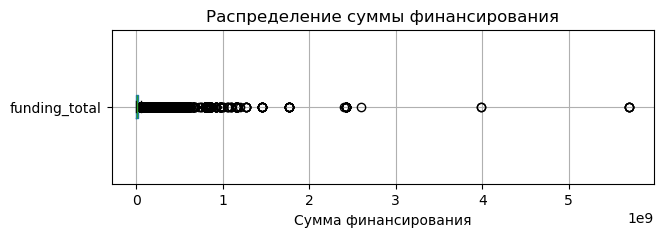

In [75]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df_filtred.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Данные имеют большое количество выбросов, сильная разница между средним и медианой, большое значение у поля стандартное отколонение. Найдем 99-й процентиль и попробуем отсечь часть выбросов.

In [76]:
# Находим 99-й процентиль
outliers = df_filtred['funding_total'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
funding_total_df = df_filtred.loc[df_filtred['funding_total'] < outliers]

# Выводим результат describe() после фильтрации данных
print(funding_total_df['funding_total'].describe())

count    5.209800e+04
mean     1.833740e+07
std      3.459826e+07
min      0.000000e+00
25%      6.000000e+05
50%      4.400000e+06
75%      2.000000e+07
max      2.839300e+08
Name: funding_total, dtype: float64


Медиана почти в два раза болье среднего, значение стандартного отклонения также достатачно велико. Найдем 90-й процентиль и отсечем ещё часть данных.

In [77]:
# Находим 50-й процентиль (медиану)
outliers = df_filtred['funding_total'].quantile(0.90)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
funding_total_df = df_filtred.loc[df_filtred['funding_total'] < outliers]

# Выводим результат describe() после фильтрации данных
print(funding_total_df['funding_total'].describe())

count    4.736100e+04
mean     9.400109e+06
std      1.305060e+07
min      0.000000e+00
25%      4.999950e+05
50%      3.175000e+06
75%      1.300000e+07
max      5.698900e+07
Name: funding_total, dtype: float64


Разница между средним и медианой уменьшилась изменилась в другую сторону, теперь среднее больше медианы в 3 раза. При этом стандартное отклонение уменьшилось в 3 раза. На сонове полученной выборки построим гистрограмму и диаграмму размаха.

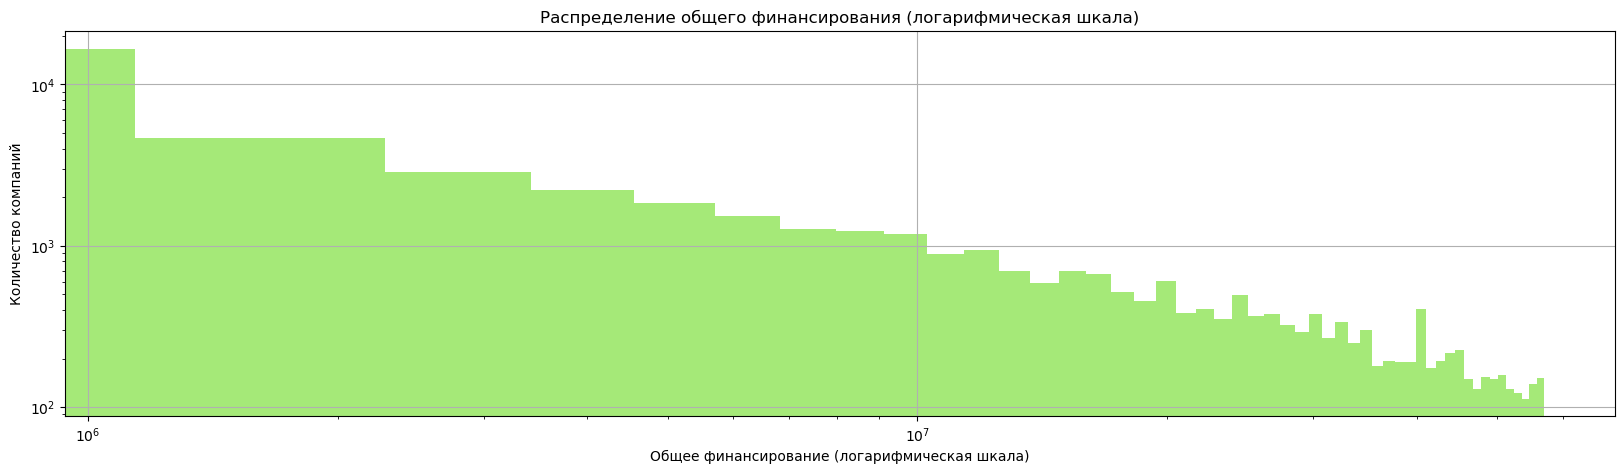

In [78]:
# Строим гистограмму 
funding_total_df['funding_total'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                log=True,
                rot=0,
                color='#87E24B',
                figsize=(20, 5)
)

# Настраиваем оформление графика
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

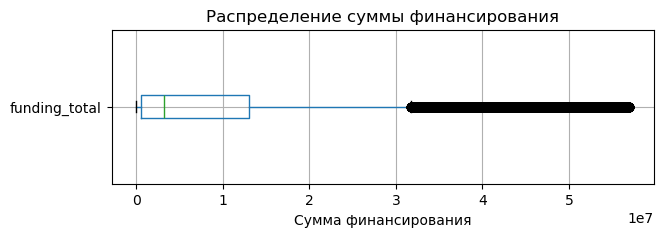

In [79]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
funding_total_df.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Типичный размер финансирования будет равен 0.02 у.е., Не типичный размер будет равен значению более 3 у.е.

Значения получаемы с помощью метода .describe(), так же как и значения полученный с помощью гистограммы и диаграммы размаха сложно анализировать и сравнивать между собой. 

Можно предположить, что к таким данным не применимы обычные способы нахождения типичных значений.

---


### Куплены забесплатно?

1. Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
2. Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, подготовим выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [80]:
# Объединим таблицы df_filtred и acquisition, чтобы найти компании проданные за 0 или за 1 доллар
df_merged_acq = df_filtred.merge(acquisition_df, left_on='company_id_funded', right_on='acquired_company_id', how='inner')

In [81]:
# Создадим датасет с компаниями проданными за 0 или за 1 доллар
df_filtred_by_acquisition = df_merged_acq.loc[(df_merged_acq['price_amount'] == 0) | (df_merged_acq['price_amount'] == 1)]

df_filtred_by_acquisition.shape

(3293, 40)

In [82]:
# Изучим количество пропусков
df_filtred_by_acquisition.isna().sum()

index_x                     0
company_id_funded           0
name                        0
category_code              85
status                      0
founded_at                610
closed_at                3263
domain                    102
network_username         1486
country_code              139
investment_rounds           0
funding_rounds              0
funding_total               0
milestones                  0
funding_round_id_x          0
company_id                  0
funded_at_x                23
funding_round_type_x        0
raised_amount_x             0
pre_money_valuation_x       0
participants_x              0
is_first_round_x            0
is_last_round_x             0
funded_at_year_x           23
index_y                     0
raised_amount_y             0
funding_round_id_y          0
funded_at_y                15
funding_round_type_y        0
pre_money_valuation_y       0
participants_y              0
is_first_round_y            0
is_last_round_y             0
funded_at_

In [83]:
df_filtred_by_acquisition[['investment_rounds', 'funding_rounds', 
                       'funding_total', 'raised_amount_y', 
                       'pre_money_valuation_y', 'participants_y']].describe()

,investment_rounds,funding_rounds,funding_total,raised_amount_y,pre_money_valuation_y,participants_y
count,3293.000000,3293.000000,3.293000e+03,3.293000e+03,3.293000e+03,3293.00000
mean,0.013362,2.609475,2.678461e+07,8.919373e+06,4.397206e+04,2.25539
std,0.147284,1.743917,2.012522e+08,6.543982e+07,1.784547e+06,2.27046
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
25%,0.000000,1.000000,2.000000e+06,6.690000e+05,0.000000e+00,1.00000
50%,0.000000,2.000000,8.800000e+06,3.100000e+06,0.000000e+00,2.00000
75%,0.000000,3.000000,2.403000e+07,8.300000e+06,0.000000e+00,3.00000
max,4.000000,12.000000,5.700000e+09,3.200000e+09,1.000000e+08,26.00000


In [84]:
df_filtred_by_acquisition.head()

,index_x,company_id_funded,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,...,participants_y,is_first_round_y,is_last_round_y,funded_at_year_y,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
4,215846,9.0,geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,...,1.0,0.0,1.0,2007.0,7954,687,9,NaN,0,2012-11-28
5,215846,9.0,geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,...,1.0,0.0,0.0,2007.0,7954,687,9,NaN,0,2012-11-28
6,215846,9.0,geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,...,2.0,1.0,0.0,2009.0,7954,687,9,NaN,0,2012-11-28
7,5112,13.0,stumbleupon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,...,4.0,0.0,0.0,2005.0,4283,20,13,NaN,0,2007-05-30
9,5112,13.0,stumbleupon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,...,6.0,0.0,0.0,2009.0,4283,20,13,NaN,0,2007-05-30


In [85]:
# Сгруппируем данные по коду страны
grouped_by_category = df_filtred_by_acquisition.groupby('category_code').agg({
    'company_id_funded': 'count'}).sort_values(by='company_id_funded', ascending=False)

print(grouped_by_category.head(10))

                 company_id_funded
category_code                     
software                       654
web                            467
mobile                         284
enterprise                     275
games_video                    174
advertising                    172
biotech                        144
ecommerce                      118
network_hosting                110
cleantech                       92


In [86]:
# Сгруппируем данные по коду страны
grouped_by_country = df_filtred_by_acquisition.groupby('country_code').agg({
    'company_id_funded': 'count'}).sort_values(by='company_id_funded', ascending=False)

grouped_by_country.head()

,company_id_funded
country_code,
USA,2606
GBR,127
CAN,91
DEU,51
ISR,41


Исходя из полученной информации, можно предположить что комапнии с суммой покупки за 1 или 0 были куплены по рыночной цене. На это указывает следующая информация:

* наличе у такхи компаний достаточного количества раундов финансирования;	
* не нулевые значения сумм финансирования;
* достаточное количество участников инвестирования.

In [87]:
# Находим 25-й процентиль
Q1 = df_filtred['funding_total'].quantile(0.25)

# Находим 75-й процентиль
Q3 = df_filtred['funding_total'].quantile(0.75)

# Рассчитаем межквартальный размах
IQR = Q3 - Q1

# Вычислим верхнюю и нижнюю границы для выбросов
upper_border = Q3 + 1.5 * IQR
lower_border = Q1 - 1.5 * IQR

print(f'Верхняя граница выбросов:{upper_border}')
print(f'Нижняя граница выбросов:{lower_border}')

Верхняя граница выбросов:50427268.625
Нижняя граница выбросов:-29280914.375


In [88]:
upper_border_q = df_filtred['funding_total'].quantile(0.89)
print(upper_border_q)

52435700.0


Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца funding_total:
* Верхняя граница выбросов:50427268.625
* Нижняя граница выбросов:-29280914.375

Значение врехней граница находится в промежутке между 0.88 и 0.89 квантилями. Так как нижняя граница меньше нуля она не соотвествует ни одному из квантилей.

Замена верхней и нижней границы выбросов на значения, рассчитаенные по процентилям, в данной ситуации, кажется корректной.

### Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

In [89]:
# Отфильтруем компании с суммой сделки больше нуля
df_merged_acq_filtred = df_merged_acq[(df_merged_acq['price_amount'] > 0)]

# Выведем полученное количество компаний
df_merged_acq_filtred.shape

(1662, 40)

In [90]:
#Рассчитаем наибольшую цену и наибольшее среднее цены по категориям
grouped_by_category = df_merged_acq_filtred.groupby(['category_code']).agg(
    max_price=pd.NamedAgg(column='price_amount', aggfunc='max'),
    median_price=pd.NamedAgg(column='price_amount', aggfunc='median'),
    var_price=pd.NamedAgg(column='price_amount', aggfunc='var'),
    cnt_company=pd.NamedAgg(column='price_amount', aggfunc='count')
).sort_values(by='cnt_company', ascending=False)

# Ограничим выборку минимально допустимым количеством компаний в категории
df_category_filtred = grouped_by_category.loc[(grouped_by_category['cnt_company'] > 50)]

df_category_filtred

,max_price,median_price,var_price,cnt_company
category_code,,,,
software,8500000000,73650000.0,1.792572e+18,236
web,1850000000,74400000.0,1.371845e+17,181
biotech,2300000000,285000000.0,1.221882e+17,181
mobile,1200000000,72000000.0,4.355165e+16,161
enterprise,1600000000,167000000.0,1.409326e+17,126
advertising,1800000000,80000000.0,6.033065e+16,110
games_video,5040000000,117000000.0,3.483151e+17,90
network_hosting,3000000000,100000000.0,5.541507e+17,79
semiconductor,4900000000,123000000.0,8.020669e+17,60


<Figure size 1500x1000 with 0 Axes>

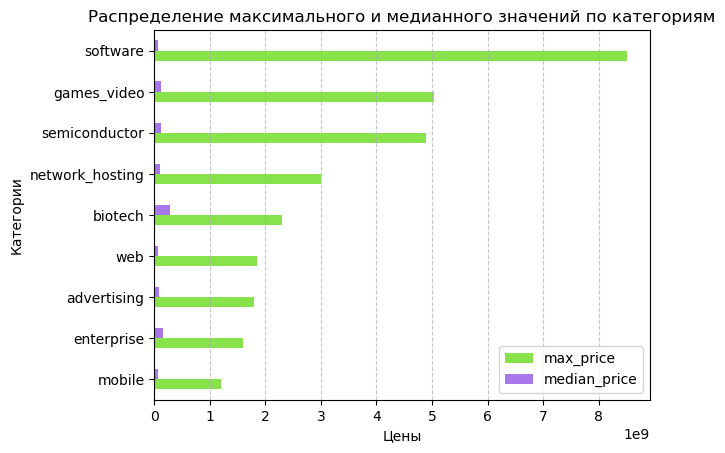

In [91]:
df_category_filtred = df_category_filtred.sort_values(by='max_price', ascending=True)

colors = ['#87E24B', '#A877E9']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_category_filtred[['max_price', 'median_price']].plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               title=f'Распределение максимального и медианного значений по категориям',
               color=colors)

plt.grid(True, linestyle='--', alpha=0.7, axis='x')

# Настраиваем оформление графика
plt.xlabel('Цены')
plt.ylabel('Категории')

# Выводим график
plt.show()

Из графика видна больше разница в размере максимального и медианного значений для одной категории стартапов. При этом большое занчение максимально цены не говорит о таком же большом значении медианного значения. 

Из чего можно сделать вывод чем больше различие между медианой и максимальным значеним тем больше разброс цен внутри одной категории. Это подтверждается графиком разброса цен:

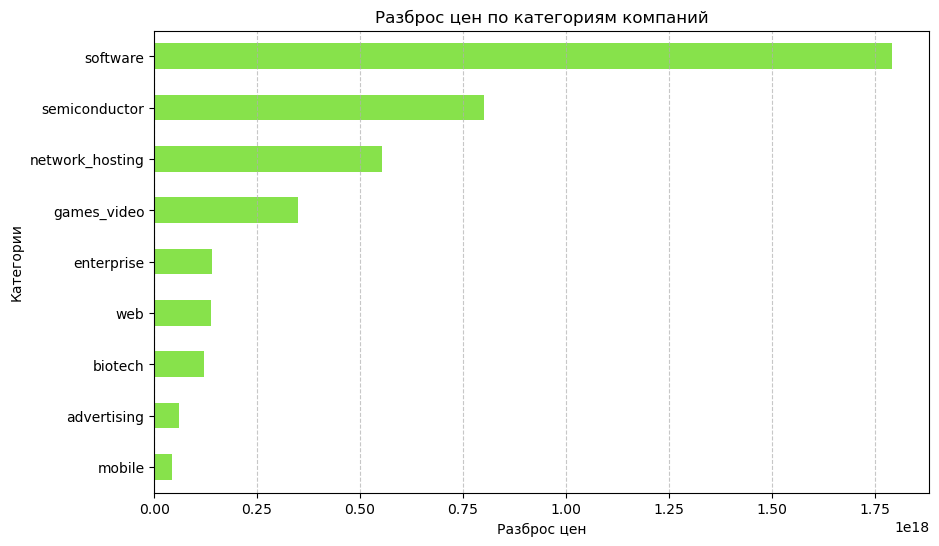

In [92]:
df_category_filtred = df_category_filtred.sort_values(by='var_price', ascending=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_category_filtred['var_price'].plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               color='#87E24B',
               title=f'Разброс цен по категориям компаний')

plt.grid(True, linestyle='--', alpha=0.7, axis='x')

# Настраиваем оформление графика
plt.xlabel('Разброс цен')
plt.ylabel('Категории')

# Выводим график
plt.show()

1. Рассчитали значения для категорий по 3-м критериям:
    - наибольшие цены - максимальное значени, медиана. Расчет производился двумя способами т.к. максимальное значение могло быть выбросом.
    - наибольший разброс (var).
2. Также ограничили выборку категориями количество компаний внутри которых больше 50, чтобы отсечь категории с маленьким количеством компаний. В итоге получили топ-9 компаний. 

Стоит отметить, что выборка, по которой проводился анализ, крайне мала - всего 1662 комании. На её основе не корректно делать прогнозы о категориях стратапов.


---

### Сколько раундов продержится стартап перед покупкой
1. Проанализируем столбец `funding_rounds`. Исследуем значения столбца. Определим типичное значение количества раундов для каждого возможного статуса стартапа.
2. Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [93]:
# Создадим срез копаний, у которых количество раундов больше 0
df_merged_filtred = df_merged.loc[df_merged['funding_rounds'] > 0]

In [94]:
# Убедимся в корректности полученных данных
df_merged_filtred['funding_rounds'].sort_values(ascending=True)

52625     1.0
20134     1.0
40339     1.0
40340     1.0
40341     1.0
         ... 
30569    15.0
30570    15.0
30571    15.0
38981    15.0
38990    15.0
Name: funding_rounds, Length: 52626, dtype: float64

In [95]:
# Рассчитаем среднее количество раундов для каждой категории компний
grouped_by_status_median = df_merged_filtred.groupby('status')['funding_rounds'].median().sort_values(ascending=False)
grouped_by_status_median

status
ipo          4.0
acquired     2.0
operating    2.0
closed       1.0
Name: funding_rounds, dtype: float64

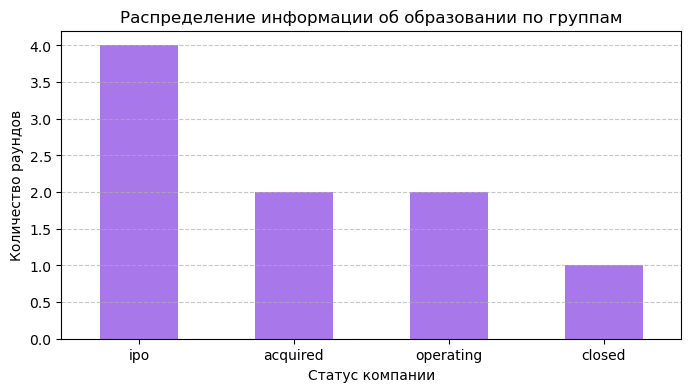

In [96]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.rcParams["figure.figsize"] = (8, 4)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_by_status_median.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               color='#A877E9',
               rot=0, # Градус вращения подписи по оси Х
               legend=False,
               title=f'Распределение информации об образовании по группам')

# Настраиваем оформление графика
plt.xlabel('Статус компании')
plt.ylabel('Количество раундов')

# Настроим отображение сетки
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Выводим график
plt.show()

Типичное значение количества раундов для каждого возможного статуса стартапа:

| Статус компании  | Кол-во раундов |
| ------------- | ------------- |
| ipo | 4 |
| acquired | 2 |
| operating | 2 |
| closed | 1 |

Большинство компаний, достигших IPO, прошли больше раундов финансирования (4), что указывает на высокую инвестиционную привлекательность. Компании, которые были приобретены или продолжают работать, получили меньшее финансирование (2 раунда). Закрытые компании привлекли наименьшее количество инвестиций (1 раунд), что может свидетельствовать о проблемах с ростом или привлечением капитала.

## Итоговый вывод и рекомендации

### Общий обзор проделанной работы

**В ходе работы над проектом были выполнены следующие задачи:**
1. Загрузка данных и знакомство с их содержимым.
2. Предобработка данных.
3. Проведение исследовательского анализа данных:
    - детальное изучение данных;
    - изучение взаимосвязи данных в столбце `rating` с другими данными.
4. Формулировение выводов по проведённому анализу.

### Ответы на исследовательские вопросы, или главные выводы

3.2 Типичный размер финансирования будет равен 0.02 у.е., Не типичный размер будет равен значению более 3 у.е. Значения получаемы с помощью метода .describe(), так же как и значения полученный с помощью гистограммы и диаграммы размаха сложно анализировать и сравнивать между собой. Можно предположить, что к таким данным не применимы обычные способы нахождения типичных значений.

3.3 Исходя из полученной информации, можно предположить что комапнии с суммой покупки за 1 или 0 были куплены по рыночной цене. 

Исходя из расчета верхней и нижней границ выбросо (50427268.625 и -29280914.375) можно предположить, что замена границы выбросов на значения, рассчитаенные по процентилям, в данной ситуации корректна.

3.4 Рассчитали значения для категорий по 3-м критериям и ограничили выборку:
- наибольшие цены - максимальное значени, медиана. Расчет производился двумя способами т.к. максимальное значение могло быть выбросом.
- наибольший разброс (var).
- категориями количество компаний внутри которых больше 50, чтобы отсечь категории с маленьким количеством компаний. 

Выборка, по которой проводился анализ, крайне мала - всего 1662 комании. На её основе не корректно делать прогнозы перспективности категорий стратапов.

3.5 Большинство компаний, достигших IPO, прошли больше раундов финансирования (4), что указывает на высокую инвестиционную привлекательность. Компании, которые были приобретены или продолжают работать, получили меньшее финансирование (2 раунда). Закрытые компании привлекли наименьшее количество инвестиций (1 раунд), что может свидетельствовать о проблемах с ростом или привлечением капитала.

**Общий вывод**:
Часть данных подкрепляет дург друга. Но в данных достаточно много пропусков, часть данных представлена в таком виде, что её сложно анализировать обычными способами нахождения типичных значений. Все эти факторы в худшую сторону влияют на качетсов и итоговые выводы исследования данных.